In [1]:
import time
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification





# Cria um toy dataset pra um problema de regressão 
x,y = make_regression(n_samples = 50,
                          n_features = 1,
                          random_state= 12,
                          noise=8
                         )

# transformando os dados em um dataframe para facilitar sua utilização
dataset = pd.DataFrame({'feature_1':x.flatten(),'target':y})

#reescalando os dados para os valores estarem entre 0 e 1.
scaler = MinMaxScaler()
scaler.fit(dataset)

dataset[dataset.columns] = scaler.transform(dataset)

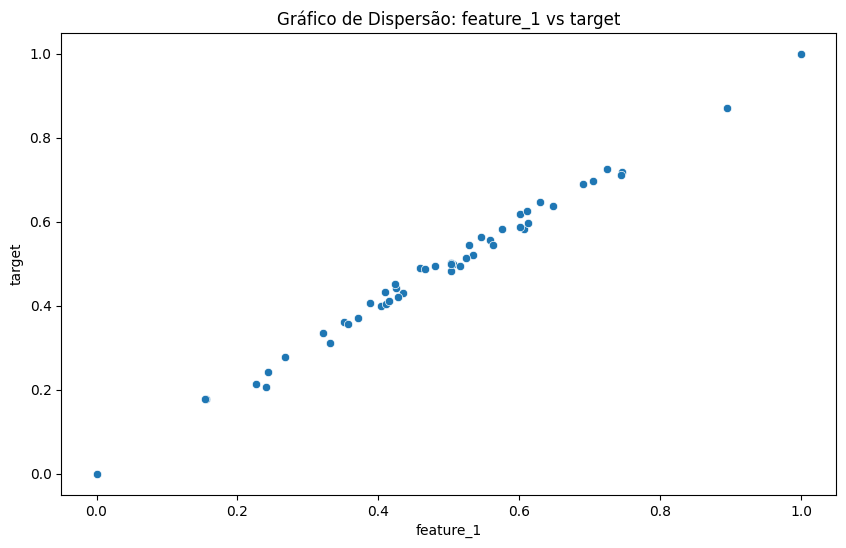

In [2]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='feature_1', y='target')

# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Dispersão: feature_1 vs target')
plt.xlabel('feature_1')
plt.ylabel('target')

# Mostrar o gráfico
plt.show()


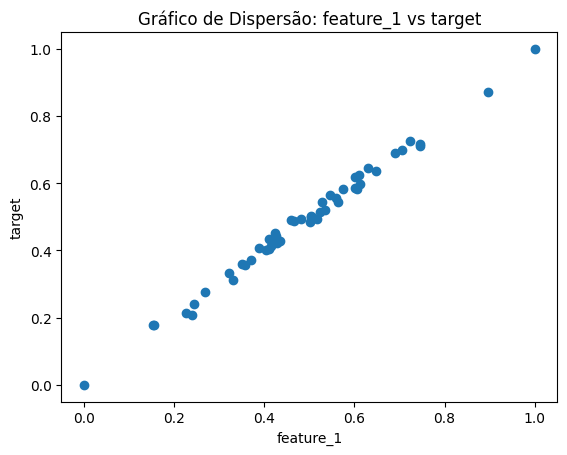

In [3]:
plt.scatter(dataset['feature_1'], dataset['target'])
plt.title('Gráfico de Dispersão: feature_1 vs target')
plt.xlabel('feature_1')
plt.ylabel('target')
plt.show()


In [4]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

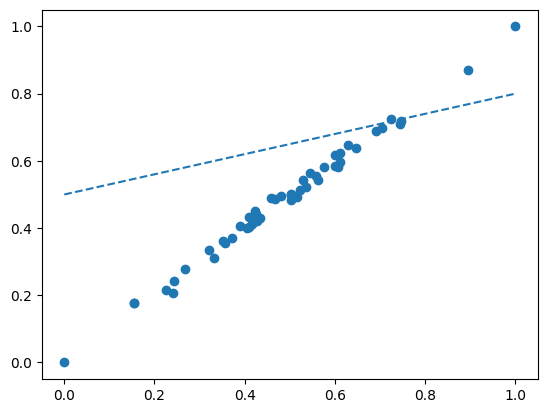

In [5]:
abline(slope = 0.3, intercept = 0.5)
plt.scatter(dataset.feature_1,dataset.target)
plt.show()

In [6]:
# Predição com o modelo y = 0.9 * feature_1 + 0
predictions = 0.9 * dataset['feature_1']

# Cálculo do erro quadrático médio (MSE)
mse = ((predictions - dataset['target']) ** 2).mean()

# Exibir o resultado
print(f'Valor aproximado do erro quadrático médio: {mse:.4f}')


Valor aproximado do erro quadrático médio: 0.0027


In [7]:
from sklearn.metrics import mean_squared_error

# Predição com o modelo y = 0.9 * feature_1 + 0
predictions = 0.9 * dataset['feature_1']

# Cálculo do erro quadrático médio (MSE) usando o método direto
mse = mean_squared_error(dataset['target'], predictions)

# Exibir o resultado
print(f'Valor aproximado do erro quadrático médio: {mse:.4f}')


Valor aproximado do erro quadrático médio: 0.0027


In [8]:
pred = 0.9 * dataset['feature_1']

erro_quad = mean_squared_error(dataset['target'], pred)

print(erro_quad)

0.0027089353878471233


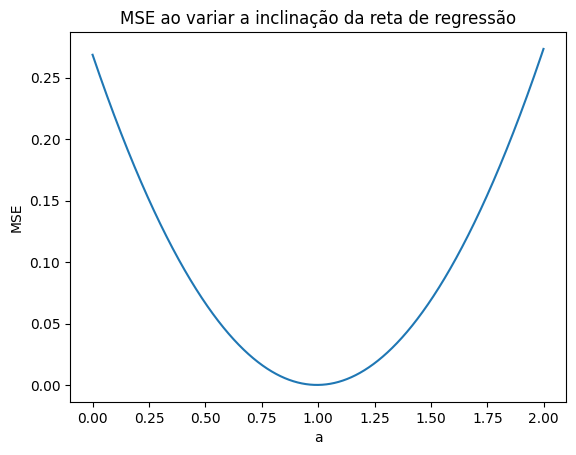

In [9]:
def erro_quadratico_medio(pred, y):
    '''
    Calcula o erro quadratico médio
    '''
    return np.mean((pred - y)**2) 

erros = []

for a in np.arange(0,2,0.001):
    
    # prediz os valores da feature 1 utilizando uma reta com inclinaçao 'a' e intercept em '0'
    preds = dataset.feature_1 * a + 0
    
    mse = erro_quadratico_medio(preds, dataset.target)
    
    erros.append(mse)

plt.plot(np.arange(0,2,0.001),erros)
plt.title('MSE ao variar a inclinação da reta de regressão')
plt.xlabel('a')
plt.ylabel('MSE')
plt.show()

In [10]:
erro_quadratico_medio(3, 2)

np.float64(1.0)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Criar o modelo de regressão linear
model = LinearRegression()

# Ajustar o modelo (X precisa ser 2D)
X = dataset[['feature_1']]  # Reformatar para 2D
y = dataset['target']

# Treinar o modelo
model.fit(X, y)

# Definir os coeficientes manualmente
model.coef_ = np.array([0.9])  # Definindo o coeficiente para 0.9
model.intercept_ = 0  # Definindo a interceptação para 0

# Fazer predições
predictions = model.predict(X)

# Cálculo do erro quadrático médio (MSE)
mse = mean_squared_error(y, predictions)

# Exibir o resultado
print(f'Valor aproximado do erro quadrático médio: {mse:.4f}')


Valor aproximado do erro quadrático médio: 0.0027


In [12]:
x,y = make_regression(n_samples = 500000,
                          n_features = 4,
                          random_state= 12,
                          noise=8
                         )

df = pd.DataFrame(x)
df['target'] = y

df = df.rename(columns = {0:'x1',1:'x2',2:'x3',3:'x4'})

scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)

In [13]:
np.random.seed(12)
pesos = [np.random.random(),np.random.random(),np.random.random(),np.random.random()]
bias = np.random.random()

In [14]:
%%time

preds = []

# itera por cada linha do conjunto de dados
for i, row in df.iterrows():
    
    # começa a predição como zero
    pred = 0
    
    # itera por cada coluna do conjunto de dados
    for i in range(0,df.shape[1] - 1):
        
        # multiplica o valor de cada coluna pelo seu respectivo peso
        pred += row[i] * pesos[i]
        
    # adiciona o bias (intercep) a soma acima
    pred += bias
    
    # salva a predição em um array de predições
    preds.append(pred)

<timed exec>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


CPU times: total: 53.6 s
Wall time: 55.3 s


In [15]:
X = np.matrix(df.drop('target', axis = 1))
W = np.matrix(pesos)

In [16]:
X.shape

(500000, 4)

In [17]:
W.shape

(1, 4)

In [18]:
%%time
preds_vet = X.dot(W.T) + bias

CPU times: total: 0 ns
Wall time: 3 ms


In [19]:
# Cria um toy dataset pra um problema de regressão 
x,y = make_regression(n_samples = 50,
                          n_features = 1,
                          random_state= 12,
                          noise=8
                         )

# transformando os dados em um dataframe para facilitar sua utilização
dataset = pd.DataFrame({'feature_1':x.flatten(),'target':y})

#reescalando os dados para os valores estarem entre 0 e 1.
scaler = MinMaxScaler()
scaler.fit(dataset)

dataset[dataset.columns] = scaler.transform(dataset)

In [20]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

x = dataset[['feature_1']]  # feature precisa ser 2D
y = dataset['target']  # target pode ser 1D

modelo1 = SGDRegressor(max_iter = 200, random_state = 12, learning_rate = 'constant')

modelo1.fit(x,y)

pred1 = modelo1.predict(x)

erro1 = mean_squared_error(y, pred1)

erro1


np.float64(0.015845594263290116)

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

df_iris = pd.DataFrame(X)
df_iris.columns = iris.feature_names[1:3]
df_iris['target'] = y

X_train, X_test, y_train, y_test = train_test_split(df_iris.drop('target',axis = 1),
                                                    df_iris.target,
                                                    test_size=0.3,
                                                    stratify = df_iris.target ,
                                                    random_state=42)

In [22]:
from sklearn.metrics import accuracy_score

modelo2 = Perceptron(max_iter = 200, random_state=12, shuffle = False, eta0 =0.5)

modelo2.fit(X_train, y_train)

pred2 = modelo2.predict(X_train)

acuracia2 = accuracy_score(y_train, pred2)

acuracia2

0.9428571428571428

In [23]:
pred3 = modelo2.predict(X_test)

acuracia3 = accuracy_score(y_test, pred3)

acuracia3

0.9555555555555556

In [24]:
iteracoes = modelo2.n_iter_

iteracoes


19

In [25]:
modelo4 = MLPClassifier(random_state=12, max_iter=300, hidden_layer_sizes=(10,5), learning_rate_init = 0.01)

modelo4.fit(X_train, y_train)

pred4 = modelo4.predict(X_train)

acuracia4 = accuracy_score(y_train, pred4)

acuracia4

0.9714285714285714

In [26]:
pred5 = modelo4.predict(X_test)

acuracia5 = accuracy_score(y_test, pred5)

acuracia5

0.9111111111111111

In [27]:
iteracoes2 = modelo4.n_iter_

iteracoes2

253

In [28]:
modelo6 = MLPClassifier(random_state=12, max_iter=2000, hidden_layer_sizes=(10,5), learning_rate_init = 0.001)

modelo6.fit(X_train, y_train)

pred6 = modelo6.predict(X_test)

acuracia6 = accuracy_score(y_test, pred6)

acuracia6

0.9111111111111111

In [29]:
iteracoes3 = modelo6.n_iter_

iteracoes3

1112

In [30]:
from sklearn.preprocessing import OrdinalEncoder


titanic = pd.read_csv('titanic.csv',usecols = ['Fare','Parch','SibSp','Age','Sex','Survived'])

enc = OrdinalEncoder()
scaler = MinMaxScaler()

titanic[['Sex']] = enc.fit_transform(titanic[['Sex']])
titanic[['Age','Fare']] = scaler.fit_transform(titanic[['Age','Fare']])
titanic.Age = titanic.Age.fillna(titanic.Age.mean())

X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis = 1),
                                                    titanic.Survived,
                                                    test_size=0.3,
                                                    stratify =titanic.Survived ,
                                                    random_state=42)

In [31]:
modelo7 = Perceptron(max_iter = 200, random_state=12, eta0 =0.02, shuffle = False)

modelo7.fit(X_train, y_train)

pred7 = modelo7.predict(X_test)

acuracia7 = accuracy_score(y_test, pred7)

acuracia7

0.6567164179104478

In [32]:
modelo8 = MLPClassifier(
    random_state=12,
    max_iter=2000,
    hidden_layer_sizes=(100, 50, 25, 10),  # Definindo as camadas ocultas
    learning_rate_init=0.01
)

modelo8.fit(X_train, y_train)

pred8 = modelo8.predict(X_test)

acuracia8 = accuracy_score(y_test, pred8)

acuracia8


0.8059701492537313